In [1]:
# Importando as Bibliotecas
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Função de Exibição Imagem
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

In [3]:
# Carrengando os Modelos de Classificadores
body_classifier = cv2.CascadeClassifier('/content/haarcascade_fullbody.xml')
vehicle_detector = cv2.CascadeClassifier('/content/haarcascade_car.xml')

## **Detecção de Pedestre - Single Frame**

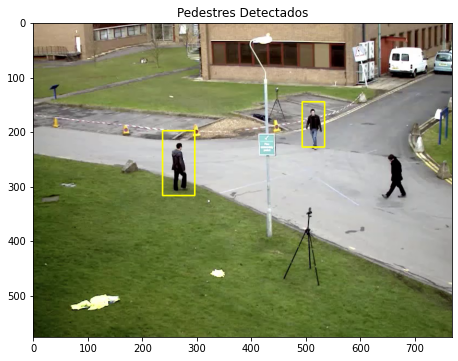

In [4]:
# Criando objeto de captura de vídeo
cap = cv2.VideoCapture('walking.mp4')

# Lendo primeiro Frame
ret, frame = cap.read()

# Se o video for lido com sucesso
if ret: 

  # Convertendo para Escala de Cinza
  gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

  # Passndo o Frame para o nosso classificador de corpo
  bodies = body_classifier.detectMultiScale(gray, 1.2, 3)

  # Extraindo caixas delimitadoras para quaisquer corpos identificados
  for (x,y,w,h) in bodies:
      cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 255), 2)
  
# Liberando nossa captura de vídeo
cap.release()   
imshow("Pedestres Detectados", frame)

## **Detecção de Pedestre - 15 Segundos**

In [5]:
# Criando objeto de captura de vídeo
cap = cv2.VideoCapture('walking.mp4')

# Obtenha a altura e a largura do Frame
w = int(cap.get(3))
h = int(cap.get(4))

# Defina o codec e crie o objeto VideoWriter. A saída é armazenada no arquivo 'walking_output.mp4'.
out = cv2.VideoWriter('walking_output.mp4', cv2.VideoWriter_fourcc('M','J','P','G'), 30, (w, h))

# Se o vídeo é carregado com sucesso
while(True):

  ret, frame = cap.read()
  if ret: 

    # Convertendo para Escala de Cinza
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Passando os Frames para o nosso classificador de corpo
    bodies = body_classifier.detectMultiScale(gray, 1.2, 3)

    # Extraindo caixas delimitadoras para quaisquer corpos identificados
    for (x,y,w,h) in bodies:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 255), 2)
    
    # Saida o video com frames no arquivo 'output.mp4'
    out.write(frame)
  else:
      break

cap.release()
out.release()

## **Detecção de Veículos - Single Frame**

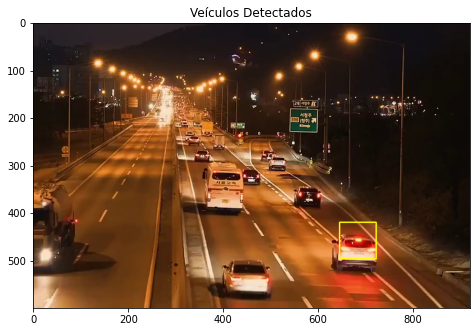

In [7]:
# Create our video capturing object
cap = cv2.VideoCapture('cars.mp4')

# Lendo primeiro Frame
ret, frame = cap.read()

# Se o video for lido com sucesso
if ret: 

  # Convertendo para Escala de Cinza
  gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

  # Passndo o Frame para o nosso classificador de Veiculos
  vehicles = vehicle_detector.detectMultiScale(gray, 1.4, 2)

  # Extraindo caixas delimitadoras para quaisquer corpos identificados
  for (x,y,w,h) in vehicles:
      cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 255), 2)
  
# Liberando nossa captura de vídeo
cap.release()   
imshow("Veículos Detectados", frame, size = 12)

## **Detecção de Veiculos - 15 Segundos**

In [8]:
# Criando objeto de captura de vídeo
cap = cv2.VideoCapture('cars.mp4')

# Obtenha a altura e a largura do Frame
w = int(cap.get(3))
h = int(cap.get(4))

# Defina o codec e crie o objeto VideoWriter. A saída é armazenada no arquivo 'walking_output.mp4'.
out = cv2.VideoWriter('cars_output.mp4', cv2.VideoWriter_fourcc('M','J','P','G'), 30, (w, h))

# Se o vídeo é carregado com sucesso
while(True):

  ret, frame = cap.read()
  if ret: 

    # Convertendo para Escala de Cinza
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Passando os Frames para o nosso classificador de veiculos
    vehicles = vehicle_detector.detectMultiScale(gray, 1.2, 3)

    # Extraindo caixas delimitadoras para quaisquer corpos identificados
    for (x,y,w,h) in vehicles:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 255), 2)
    
    # Saida o video com frames no arquivo 'output.mp4'
    out.write(frame)
  else:
      break

cap.release()
out.release()